In [14]:
# Load results and print
import json
import os
import matplotlib.pyplot as plt

RESULTS_PATH = "../results.json"
if not os.path.exists(RESULTS_PATH):
    raise FileNotFoundError("Run evaluation notebook first to produce results.json")

with open(RESULTS_PATH, 'r') as f:
    results = json.load(f)

print("Loaded results for models:", list(results.keys()))

Loaded results for models: ['SqueezeNet', 'MobileNetV1', 'MobileNetV2', 'MobileNetV3', 'ShiftNet', 'ShuffleNetV2']


In [15]:
# Parse metrics
models = []
acc = []
time_total = []
time_per_sample = []
flops = []
params = []
carbon = []

for m, v in results.items():
    models.append(m)
    acc.append(v.get("accuracy"))
    time_total.append(v.get("inference_time_sec"))
    flops.append(v.get("FLOPs"))
    params.append(v.get("params"))
    carbon.append(v.get("carbon_kg"))

print("Models:", models)

Models: ['SqueezeNet', 'MobileNetV1', 'MobileNetV2', 'MobileNetV3', 'ShiftNet', 'ShuffleNetV2']


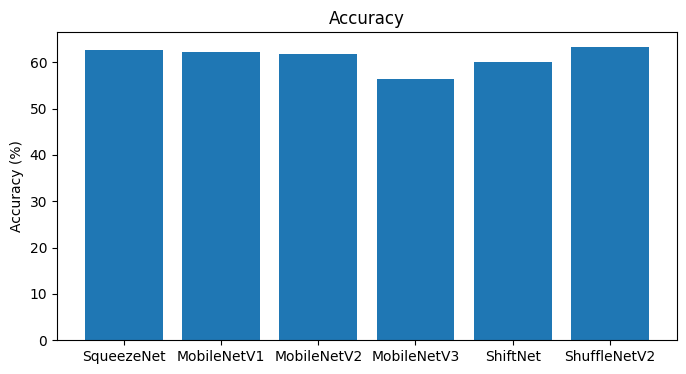

In [16]:
# Accuracy and inference time per sample
plt.figure(figsize=(8,4))
plt.bar(models, [a * 100 if a <=1 else a for a in acc])
plt.title("Accuracy")
plt.ylabel("Accuracy (%)")
plt.show()

In [17]:
# Text table of FLOPs / params / carbon
for m in models:
    print(f"--- {m} ---")
    print("FLOPs:", results[m].get("flops"))
    print("Params:", results[m].get("parameters"))
    print("Carbon (kg CO2):", results[m].get("co2_emissions_kg"))
    print()


--- SqueezeNet ---
FLOPs: 32.01 MMac
Params: 735.56 k
Carbon (kg CO2): 0.000463

--- MobileNetV1 ---
FLOPs: 29.48 MMac
Params: 3.21 M
Carbon (kg CO2): 0.000408

--- MobileNetV2 ---
FLOPs: 17.19 MMac
Params: 2.23 M
Carbon (kg CO2): 0.00038

--- MobileNetV3 ---
FLOPs: 4.21 MMac
Params: 1.52 M
Carbon (kg CO2): 0.000217

--- ShiftNet ---
FLOPs: 7.95 MMac
Params: 179.94 k
Carbon (kg CO2): 0.000151

--- ShuffleNetV2 ---
FLOPs: 26.18 MMac
Params: 1.26 M
Carbon (kg CO2): 0.000411



In [18]:
import pandas as pd

rows = []
for m in models:
    v = results[m]
    rows.append({
        "model": m,
        "accuracy": v.get("accuracy"),
        "inf_time_total_s": v.get("inference_time_sec"),
        "energy_consumed_kwh": v.get("energy_consumed_kwh"),
        "flops": v.get("flops"),
        "params": v.get("parameters"),
        "carbon_kg": v.get("co2_emissions_kg")
    })

df = pd.DataFrame(rows)
print(df.to_string(index=False))

       model  accuracy  inf_time_total_s  energy_consumed_kwh      flops   params  carbon_kg
  SqueezeNet     62.62             15.15             0.000730 32.01 MMac 735.56 k   0.000463
 MobileNetV1     62.16             14.66             0.000643 29.48 MMac   3.21 M   0.000408
 MobileNetV2     61.77             13.34             0.000598 17.19 MMac   2.23 M   0.000380
 MobileNetV3     56.42              7.25             0.000342  4.21 MMac   1.52 M   0.000217
    ShiftNet     60.07              9.18             0.000238  7.95 MMac 179.94 k   0.000151
ShuffleNetV2     63.29             13.92             0.000647 26.18 MMac   1.26 M   0.000411
